In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt 
from scipy.stats import norm 

In [2]:
def load(path):
    with open(path, 'rb') as handle:
        data = pickle.load(handle)
    return data

Loading full set ( all logs components ) and separating logs path and components

In [4]:
full_set = load(r'\\10.224.186.68\AD-Shared\F360\Tools\LogSets\FullSet\fullset_dropped_comps.pickle')
logs_paths = full_set.path
full_set = full_set.drop('path', axis=1)

Normalizing full set and value's rounding

In [5]:
full_set = full_set - full_set.mean()
std = full_set.std()
full_set = full_set / std
full_set = full_set.round(3)
full_set_temp = full_set.copy(deep=True)

In [6]:
full_set = full_set.dropna(axis=1, how='all')
full_set = full_set.fillna(0)

In [7]:
droped_features = set(full_set_temp.columns.tolist()) - set(full_set.columns.tolist())

In [15]:
droped_features

set()

In [17]:
full_set.describe()

,mean_num_objs,max_num_objs,mean_num_moving_objs,max_num_moving_objs,mean_num_stat_objs,max_num_stat_objs,mean_num_stat_movable_objs,max_num_stat_movable_objs,num_unique_objs/log_length,num_unique_moving_objs/log_length,...,min_num_of_Truck,mean_num_of_Truck,max_num_of_Truck,min_num_of_Pedestrian,mean_num_of_Pedestrian,max_num_of_Pedestrian,num_host_overtaking_mov_target_life_more50,num_host_overtaking_mov_target_life_less25,num_target_overtaking_host_life_more50,num_target_overtaking_host_life_less25
count,6.340000e+02,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,...,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,2.744037e-16,0.000043,0.000041,0.000208,-0.000008,0.000006,-0.000074,0.000281,0.000006,-0.000041,...,-0.000013,0.000030,-0.000363,-0.000267,0.000005,-0.000011,-0.000393,-0.000052,-0.000237,0.000431
std,1.000013e+00,1.000137,0.999981,0.999923,0.999979,1.000025,1.000031,0.999866,0.999997,1.000005,...,0.999779,0.999995,1.000095,1.000125,1.000001,1.000040,1.000075,0.999978,1.000079,0.999893
min,-1.489000e+00,-1.638000,-0.636000,-0.643000,-1.520000,-1.671000,-0.322000,-0.383000,-0.980000,-0.456000,...,-0.500000,-0.341000,-0.427000,-0.383000,-1.139000,-1.359000,-0.227000,-0.087000,-0.434000,-0.176000
25%,-6.682500e-01,-0.727000,-0.494750,-0.499000,-0.658750,-0.716750,-0.322000,-0.383000,-0.523750,-0.419000,...,-0.500000,-0.341000,-0.427000,-0.383000,-0.730500,-0.644000,-0.227000,-0.087000,-0.434000,-0.176000
50%,-3.630000e-01,-0.413000,-0.387000,-0.499000,-0.326500,-0.366000,-0.322000,-0.383000,-0.366500,-0.387000,...,-0.500000,-0.341000,-0.427000,-0.383000,-0.313500,-0.235000,-0.227000,-0.087000,-0.434000,-0.176000
75%,5.147500e-01,0.623000,-0.333250,-0.213000,0.394500,0.474000,-0.266500,-0.112000,0.001000,-0.256000,...,-0.500000,-0.341000,-0.427000,-0.383000,0.521750,0.480000,-0.227000,-0.087000,-0.060000,-0.176000
max,2.606000e+00,2.067000,3.857000,6.954000,2.820000,2.212000,6.789000,7.484000,4.592000,9.023000,...,1.996000,7.449000,5.863000,7.888000,4.647000,4.872000,10.703000,18.288000,7.048000,10.478000


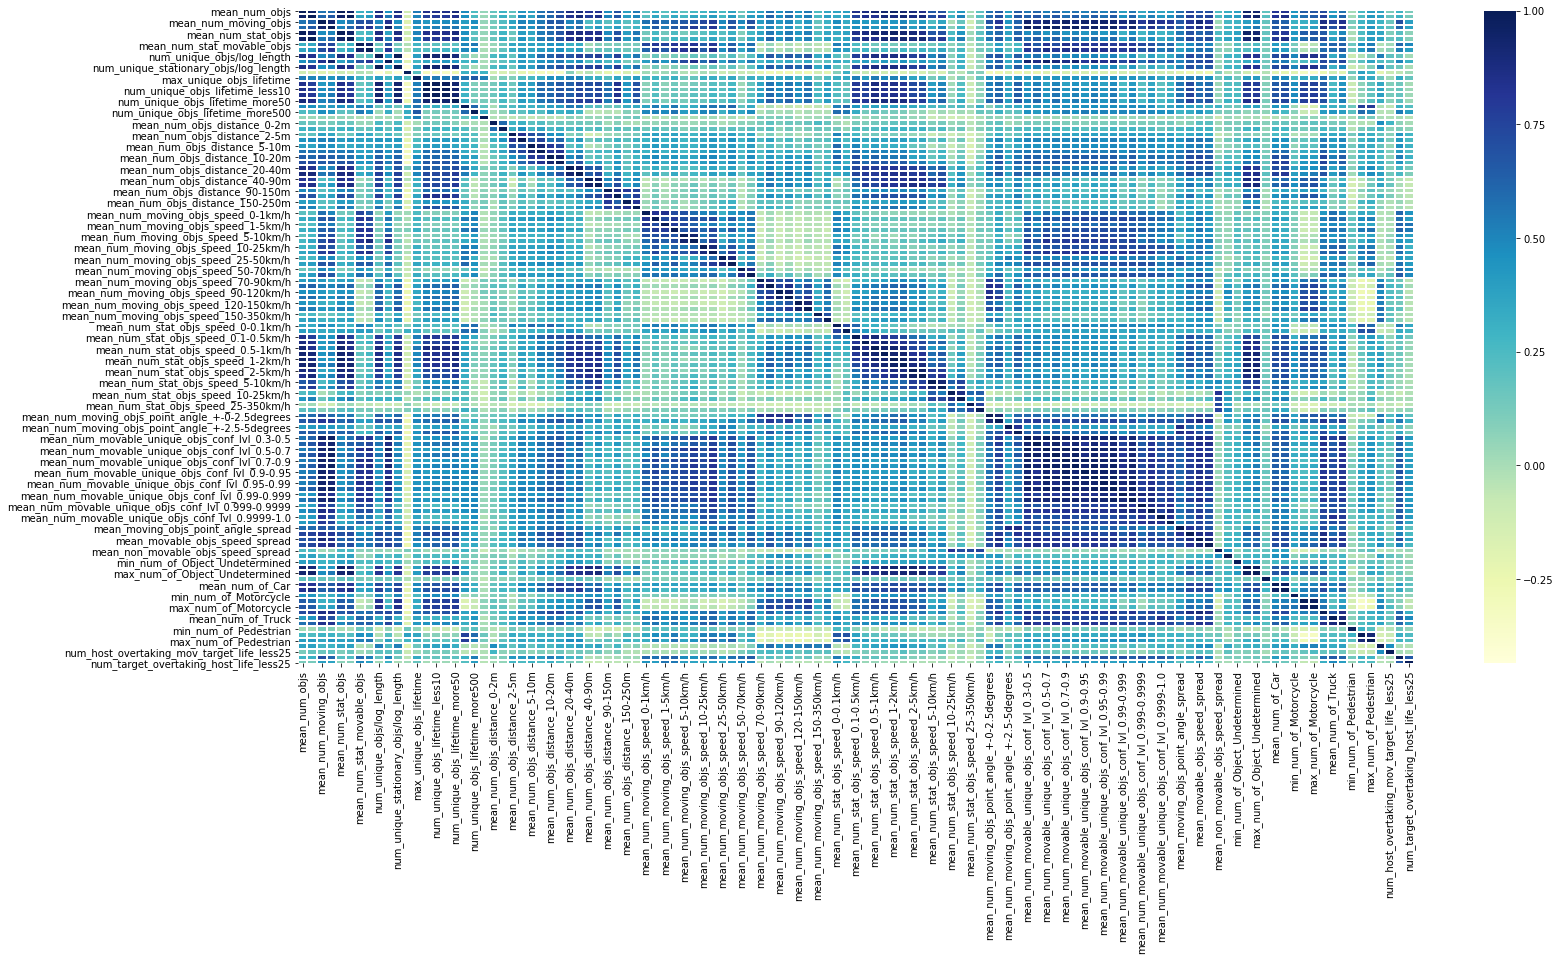

In [9]:
corrmat = full_set.corr() 
  
f, ax = plt.subplots(figsize =(25, 12)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 1) 

ValueError: The condensed distance matrix must contain only finite values.

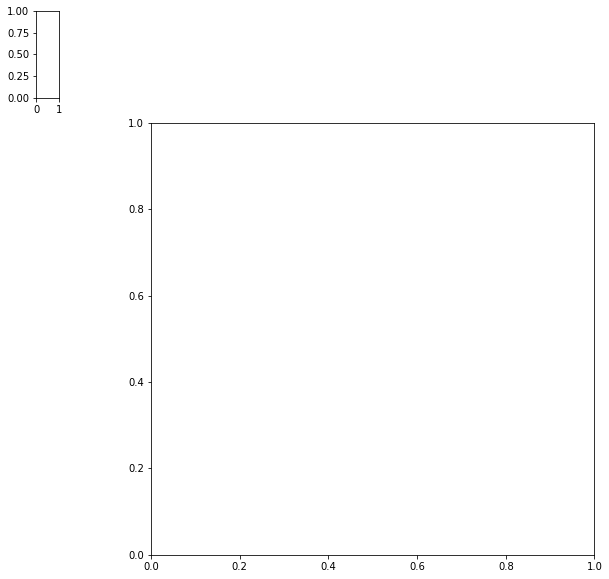

In [26]:
# corrmat = df.corr() 
  
# cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
# plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 

In [28]:
# Droping reduntant and not important features
features_to_drop = ['f_moving', 'timestamp', 'pointing_angle', 'length', 'width', 'tracker_obj_id',
                    'scan_idx', 'velocity_longitudinal', 'velocity_lateral',
                   'reference_point_longitudinal', 'reference_point_lateral', 'yaw_rate']
df_droped = df.drop(features_to_drop, axis=1)

ValueError: The condensed distance matrix must contain only finite values.

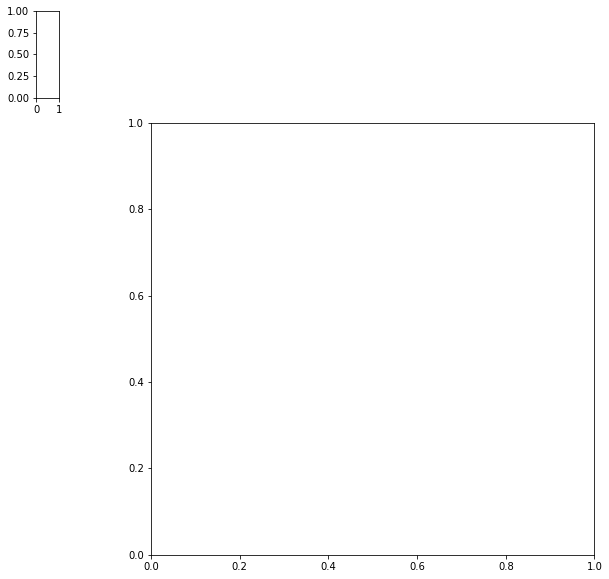

In [25]:
corrmat = full_set.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 

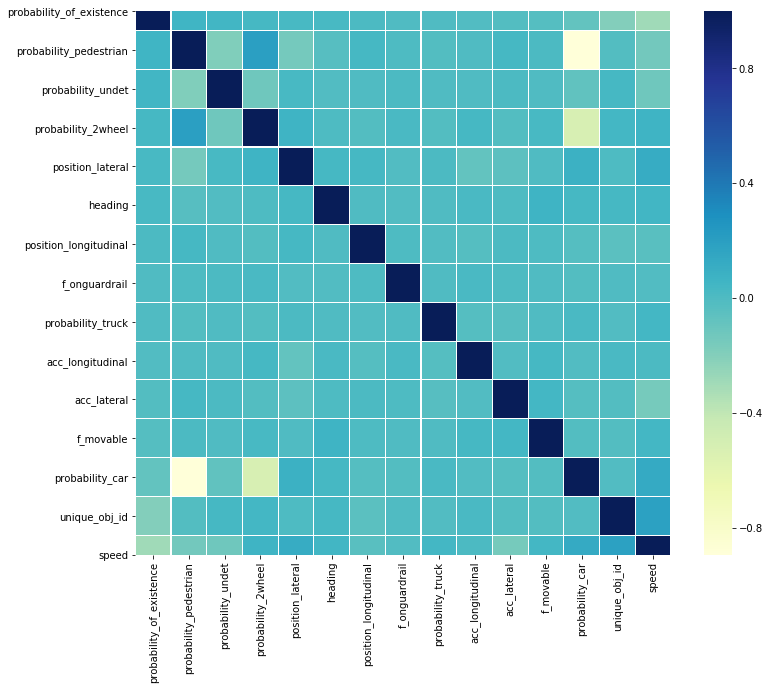

In [30]:
k = 15 
  
cols = corrmat.nlargest(k, 'probability_of_existence')['probability_of_existence'].index 
  
cm = np.corrcoef(df_droped[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 